In [47]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
from scipy import ndimage
from skimage import filters
from skimage.morphology import disk

In [2]:
img = cv.imread('origin.jpg', cv.IMREAD_GRAYSCALE)

In [3]:
def show(img):
    plt.imshow(img, cmap='gray')

In [4]:
def normalize(img, k=1):
    mi = np.min(img)
    ma = np.max(img - mi)
    return (img - mi) * k/ (ma - mi)

In [5]:
def canny(img, low, high, size):
    ret = cv.Canny(normalize(img, k=255).astype(np.uint8), low, high, size)
    show(ret)
    return ret

In [6]:
def band_pass(img, high, low):
    fq = np.fft.fft2(img)
    f_low = ndimage.fourier_ellipsoid(fq, size=low)
    f_high = ndimage.fourier_ellipsoid(fq, size=high)
    recon = np.fft.ifft2(f_high - f_low)
    plt.imshow(recon.real, cmap='gray')
    return recon.real

In [7]:
def claclahe(img, limit, size):
    clahe = cv.createCLAHE(clipLimit=limit, tileGridSize=size)
    cl = clahe.apply(normalize(img, k=255).astype(np.uint8))
    plt.imshow(cl, cmap='gray')
    return cl

In [8]:
def histeq(img):
    ret = cv.equalizeHist(normalize(img, k=255).astype(np.uint8))
    show(ret)
    return ret

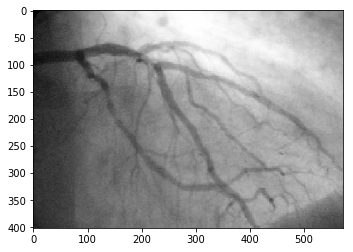

In [9]:
plt.imshow(img, cmap='gray')

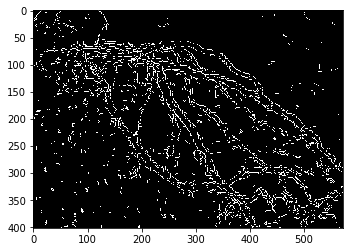

In [10]:
ori_can = cv.Canny(img, 40, 65, (5, 5))
show(ori_can)

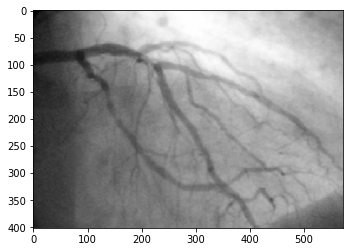

In [11]:
plt.imshow(cv.blur(img, (3, 3)), cmap='gray')

In [12]:
def summary(X):
    return (X.dtype, X.shape, np.max(X), np.min(X), np.mean(X))

In [13]:
histeq = cv.equalizeHist(img)

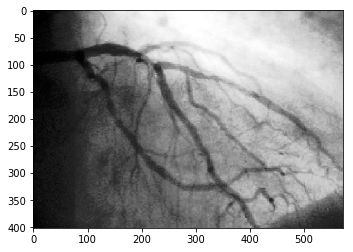

In [14]:
plt.imshow(histeq, cmap='gray')

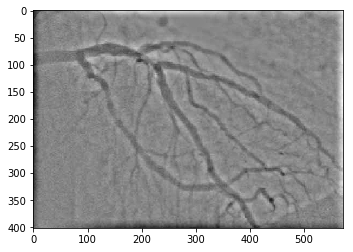

In [15]:
f_img = band_pass(img, 0, 30)

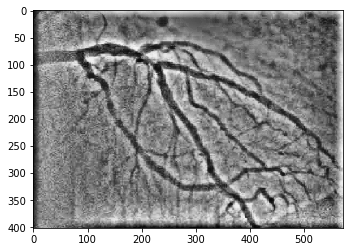

In [16]:
cl = claclahe(f_img, 4, (10, 10))

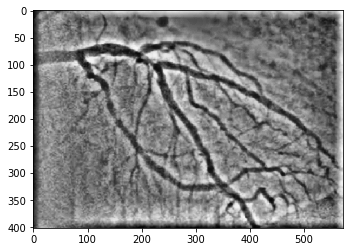

In [17]:
cl = claclahe(cv.blur(f_img, (3, 3)), 4, (10, 10) )

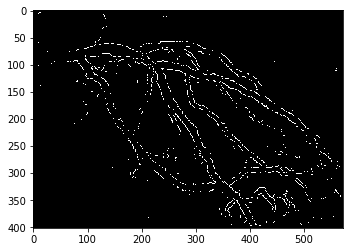

In [18]:
show(cv.Canny(cl, 240, 250, (3, 3)))

In [20]:
plt.imsave('band-pass.jpg', cl, cmap='gray')

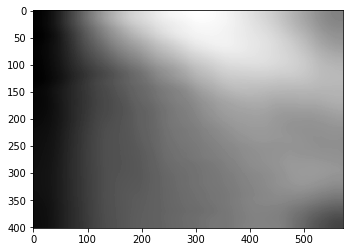

In [21]:
blr = cv.blur(img, (100,100))
show(blr)

In [22]:
plt.imsave('blr.png', blr, cmap='gray')

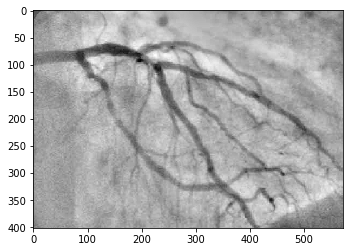

In [23]:
n = img.astype(np.float32) - blr.astype(np.float32)
norm_n = normalize(n)
plt.imshow(norm_n, cmap='gray')

In [24]:
plt.imsave('norm_n.jpg', norm_n, cmap='gray')

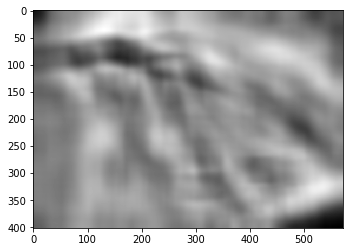

In [25]:
blr2 = cv.blur(norm_n, (50, 50))
show(blr2)

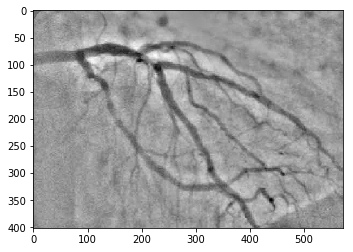

In [26]:
norm_2 = normalize(norm_n - blr2)
show(norm_2)

In [27]:
summary(norm_2)

(dtype('float32'), (402, 573), 0.62873065, 0.0, 0.37117007)

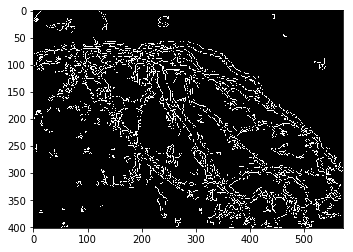

In [28]:
can = canny(norm_2, 50, 150, (5, 5))

In [29]:
plt.imsave('canny_norm.png', can, cmap='gray')

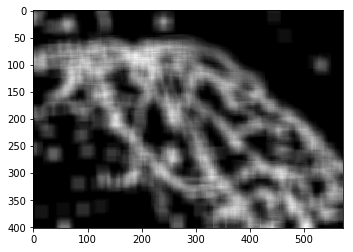

In [30]:
show(cv.blur(can, (25, 25)))

/home/baomingkun/.local/lib/python3.6/site-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float32 to uint8
  .format(dtypeobj_in, dtypeobj_out))


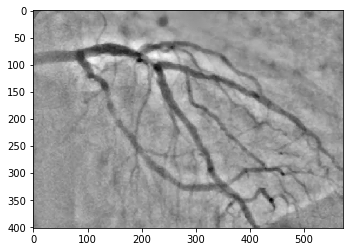

In [40]:
show(filters.median(normalize(norm_2)))

/home/baomingkun/.local/lib/python3.6/site-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float32 to uint8
  .format(dtypeobj_in, dtypeobj_out))


(dtype('uint8'), (402, 573), 253, 5, 150.56578798850424)


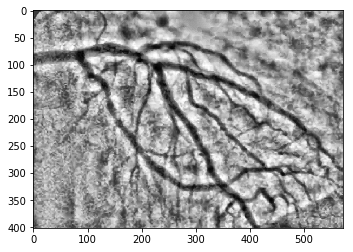

In [44]:
med = filters.median(normalize(norm_2))
print(summary(med))
clahe = cv.createCLAHE(clipLimit=4, tileGridSize=(20, 20))
show(clahe.apply(med.astype(np.uint8)))

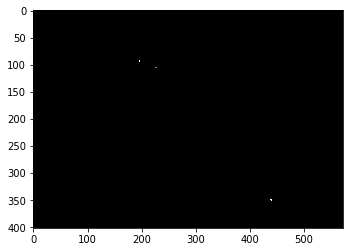

In [43]:
show(claclahe(med, 2, (20, 20)))

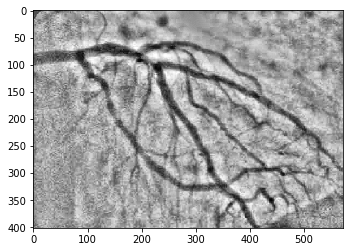

In [35]:
norm_2_cl = claclahe(norm_2, 2, (20, 20))

In [32]:
plt.imsave('norm_2_cl.jpg', norm_2_cl, cmap='gray')

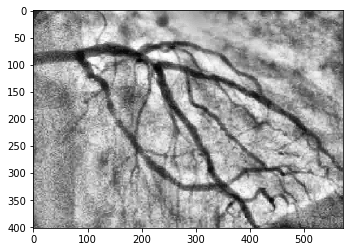

In [45]:
norm_n_cl = claclahe(norm_n, 4, (10, 10))

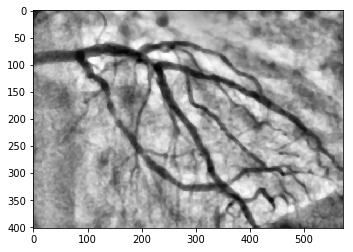

In [51]:
show(filters.median(norm_n_cl, disk(3)))

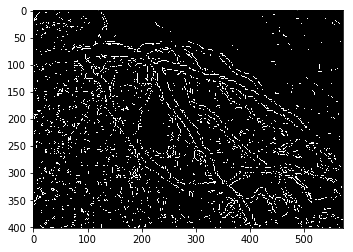

In [45]:
show(cv.Canny(norm_n_cl, 200, 250, (3, 3)))

In [46]:
plt.imsave('norm_cl.jpg', norm_n_cl, cmap='gray')

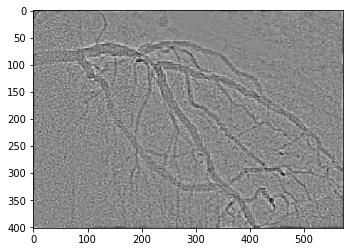

In [47]:
out = band_pass(norm_n, 0, 10)

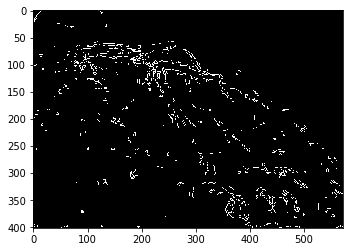

In [48]:
out_can = canny(out, 100, 200, (5, 5))

In [49]:
summary(norm_n)

(dtype('float32'), (402, 573), 0.6064815, 0.0, 0.3934042)

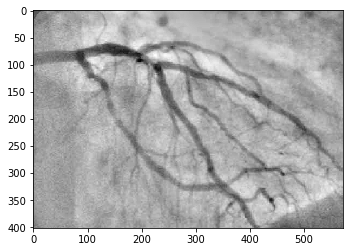

In [50]:
show(norm_n)

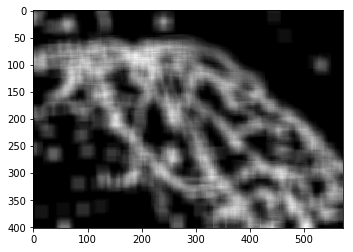

In [51]:
can_mask = cv.blur(can, (25, 25))
show(can_mask)

In [66]:
plt.imsave('can_mask.png', can_mask, cmap='gray')

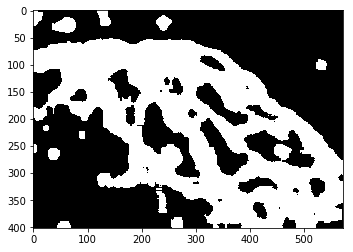

In [52]:
show(can_mask > 20)

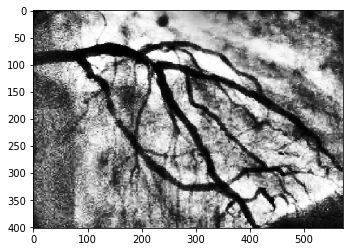

In [53]:
eh_n = cv.equalizeHist(normalize(norm_n, k=255).astype(np.uint8))
plt.imshow(eh_n, cmap='gray')

In [63]:
plt.imsave('norm_n_hist.png', eh_n, cmap='gray')

In [61]:
summary(can_mask)

(dtype('uint8'), (402, 573), 84, 0, 20.314453040209077)

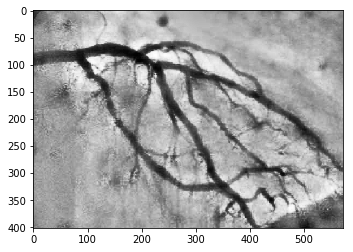

In [54]:
k = 1
mask = normalize(can_mask)
mix = normalize(eh_n) * mask + (1 - mask) * normalize(norm_n)
show(mix)

In [55]:
plt.imsave('blur_mix.png', mix, cmap='gray')

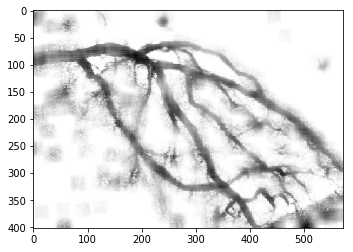

In [56]:
white_mix = normalize(eh_n) * mask + (1 - mask) * np.ones_like(eh_n)
show(white_mix)

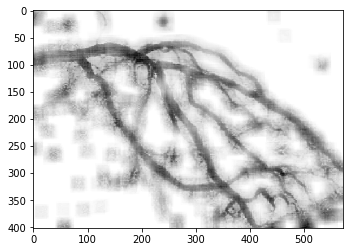

In [57]:
out_mix = normalize(out) * mask * 0.5 + normalize(eh_n) * mask * 0.5 + (1 - mask) * np.ones_like(eh_n)
show(out_mix)

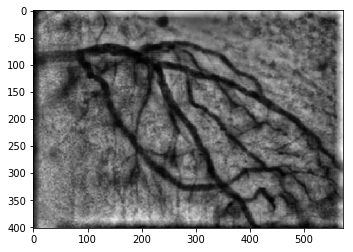

In [58]:
cl_mix = normalize(out) * mask * 0.9 + normalize(eh_n) * mask * 0.1 + (1 - mask) * cl
show(cl_mix)

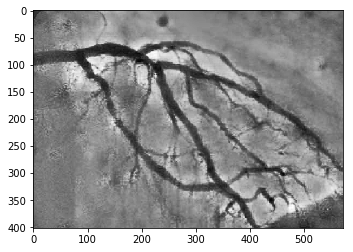

In [59]:
all_mix = normalize(out) * mask * 0.3 + normalize(eh_n) * mask * 0.7 + (1 - mask) * norm_n
show(all_mix)

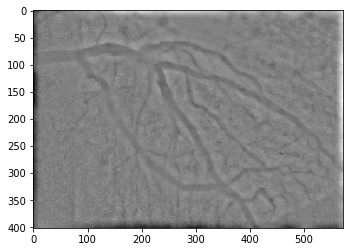

In [60]:
f_mix = normalize(out) * mask * 0.5 + normalize(eh_n) * mask * 0.5 + (1 - mask) * f_img
show(f_mix)

In [60]:
plt.imsave('mix.png', mix, cmap='gray')

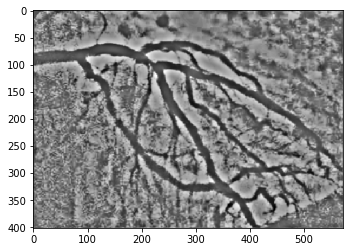

In [113]:
out = band_pass(eh_n, 3, 30)

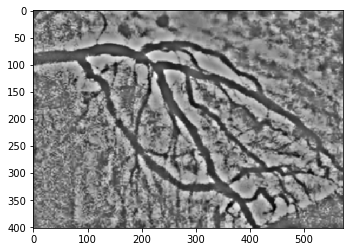

In [109]:
b = cv.blur(out, (3, 3))
plt.imshow(b, cmap='gray')

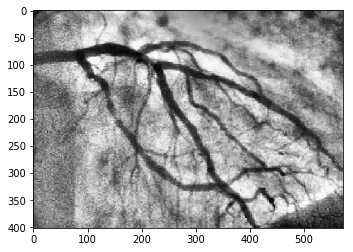

In [91]:
clahe = cv.createCLAHE(clipLimit=4.0, tileGridSize=(4, 4))
cl = clahe.apply(normalize(norm_n, k=255).astype(np.uint8))
plt.imshow(cl, cmap='gray')

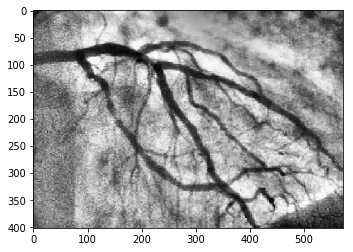

In [99]:
show(cl)

In [64]:
plt.imsave('cl.png', cl, cmap='gray')

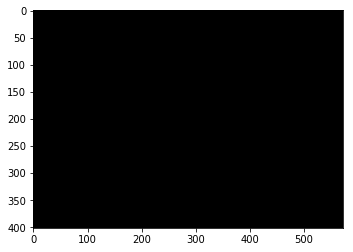

In [116]:
cl_con = canny(cl, 50, 150, (3, 3))

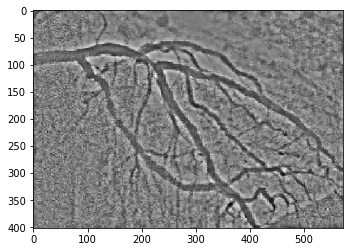

In [78]:
fed = band_pass(cl, 0, 20)

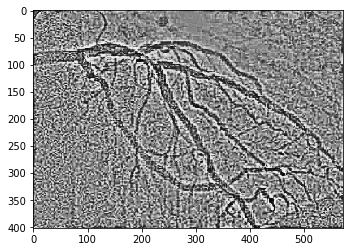

In [90]:
dot = clahe.apply(normalize(out, 255).astype(np.uint8))
plt.imshow(dot, cmap='gray')

In [91]:
type(dot)

numpy.ndarray

In [92]:
plt.imsave('dot.png', dot, cmap=plt.cm.gray)

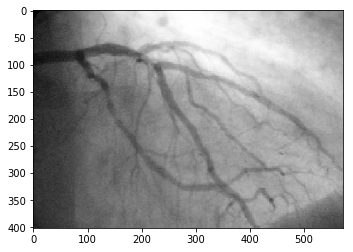

In [70]:
plt.imshow(img, cmap='gray')